In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
from scipy.stats import linregress
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
# zip them together into a tuple
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
# unzipped a tuple. Can only be done once. You can only unzip a zipped tuple once before it is
# removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [5]:
# to make the full url for the city requested
url_base = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
# City = "Nashville"
url = url_base + "&APPID=" + weather_api_key
# query_URL

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# cities = ['nashville', 'pensacola', 'denver', 'susanville']
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. Replace spaces in the city name with a + so that it is a complete city name.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shipunovo
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | sakakah
Processing Record 6 of Set 1 | salinas
Processing Record 7 of Set 1 | dingle
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | cabra
Processing Record 11 of Set 1 | lianyuan
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | talaya
Processing Record 16 of Set 1 | ankazoabo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 

Processing Record 37 of Set 4 | ketchikan
Processing Record 38 of Set 4 | kollumerland
City not found. Skipping...
Processing Record 39 of Set 4 | marsh harbour
Processing Record 40 of Set 4 | soyo
Processing Record 41 of Set 4 | qingdao
Processing Record 42 of Set 4 | mersing
Processing Record 43 of Set 4 | san carlos del zulia
Processing Record 44 of Set 4 | flinders
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | beringovskiy
Processing Record 47 of Set 4 | finschhafen
Processing Record 48 of Set 4 | marquette
Processing Record 49 of Set 4 | srandakan
Processing Record 50 of Set 4 | russell
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | itarema
Processing Record 3 of Set 5 | baykit
Processing Record 4 of Set 5 | liepaja
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | salta
Processing Record 7 of Set 5 | yoichi
Processing Record 8 of Set 5 | constitucion
Processing Record 9 of Set 5 | bambanglipuro
Processing Rec

Processing Record 25 of Set 8 | desnogorsk
Processing Record 26 of Set 8 | miramar
Processing Record 27 of Set 8 | lolua
City not found. Skipping...
Processing Record 28 of Set 8 | ahuimanu
Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | jinchang
Processing Record 31 of Set 8 | betioky
Processing Record 32 of Set 8 | giddalur
Processing Record 33 of Set 8 | sol-iletsk
Processing Record 34 of Set 8 | benghazi
Processing Record 35 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 36 of Set 8 | camacupa
Processing Record 37 of Set 8 | wanning
Processing Record 38 of Set 8 | banyo
Processing Record 39 of Set 8 | goure
Processing Record 40 of Set 8 | alotau
City not found. Skipping...
Processing Record 41 of Set 8 | urulga
City not found. Skipping...
Processing Record 42 of Set 8 | vila
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | kalabo
Processing Record 45 of Set 8 | birao
Processing Record 46 of Set 8 | caravelas
Proces

Processing Record 9 of Set 12 | kabinda
Processing Record 10 of Set 12 | faya
Processing Record 11 of Set 12 | ibb
Processing Record 12 of Set 12 | boyolangu
Processing Record 13 of Set 12 | lahaina
Processing Record 14 of Set 12 | balykshi
Processing Record 15 of Set 12 | batagay-alyta
Processing Record 16 of Set 12 | antalaha
Processing Record 17 of Set 12 | kidal
Processing Record 18 of Set 12 | half moon bay
Processing Record 19 of Set 12 | bolshoye murashkino
Processing Record 20 of Set 12 | worland
Processing Record 21 of Set 12 | kloulklubed
Processing Record 22 of Set 12 | lieksa
Processing Record 23 of Set 12 | vardo
Processing Record 24 of Set 12 | buala
Processing Record 25 of Set 12 | palembang
Processing Record 26 of Set 12 | ilanskiy
Processing Record 27 of Set 12 | malmyzh
Processing Record 28 of Set 12 | tagusao
Processing Record 29 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 30 of Set 12 | itapirapua
Processing Record 31 of Set 12 | bossangoa
P

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shipunovo,52.1582,82.2173,34.56,84,4,5.01,RU,2021-04-17 20:38:45
1,Bredasdorp,-34.5322,20.0403,50.00,93,0,5.75,ZA,2021-04-17 20:38:45
2,Norman Wells,65.2820,-126.8329,42.80,52,20,5.75,CA,2021-04-17 20:38:46
3,Sakakah,29.9697,40.2064,77.00,25,0,9.22,SA,2021-04-17 20:38:46
4,Salinas,36.6777,-121.6555,63.00,55,1,11.50,US,2021-04-17 20:38:46
5,Dingle,10.9995,122.6711,76.23,80,100,9.40,PH,2021-04-17 20:38:47
6,Bethel,41.3712,-73.4140,51.80,46,90,6.91,US,2021-04-17 20:38:47
7,Cabra,37.4725,-4.4421,60.01,43,3,3.18,ES,2021-04-17 20:38:47
8,Lianyuan,27.6883,111.6642,61.88,88,100,2.95,CN,2021-04-17 20:38:48
9,Hobart,-42.8794,147.3294,55.40,62,75,12.66,AU,2021-04-17 20:38:48


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shipunovo,RU,2021-04-17 20:38:45,52.1582,82.2173,34.56,84,4,5.01
1,Bredasdorp,ZA,2021-04-17 20:38:45,-34.5322,20.0403,50.00,93,0,5.75
2,Norman Wells,CA,2021-04-17 20:38:46,65.2820,-126.8329,42.80,52,20,5.75
3,Sakakah,SA,2021-04-17 20:38:46,29.9697,40.2064,77.00,25,0,9.22
4,Salinas,US,2021-04-17 20:38:46,36.6777,-121.6555,63.00,55,1,11.50
...,...,...,...,...,...,...,...,...,...
545,Tiarei,PF,2021-04-17 20:41:24,-17.5333,-149.3333,86.00,70,20,14.97
546,Fengrun,CN,2021-04-17 20:41:24,39.8333,118.1167,46.29,19,0,3.20
547,Mudgee,AU,2021-04-17 20:37:17,-32.5943,149.5871,46.40,93,90,3.44
548,Mitu,CO,2021-04-17 20:41:25,1.1983,-70.1733,82.36,68,58,3.13


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/17/21'

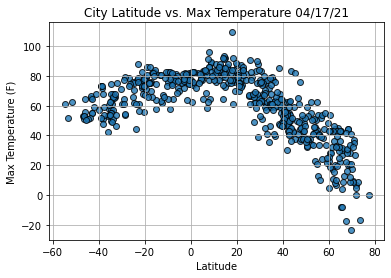

In [16]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

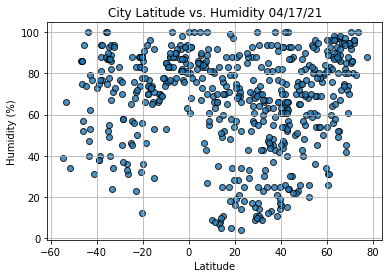

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

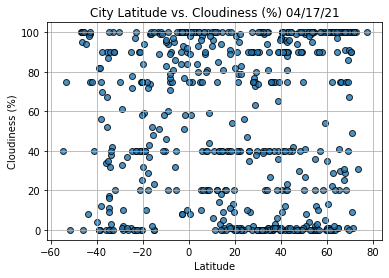

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

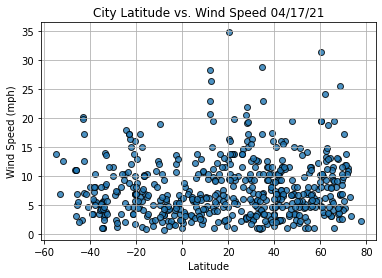

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

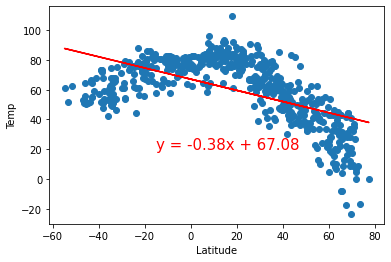

In [29]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats, max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-15,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [83]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [84]:
# The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].
index13 = city_data_df.loc[13]
index13

City                    Ankazoabo
Country                        MG
Date          2021-04-17 20:38:49
Lat                      -22.2833
Lng                       44.5167
Max Temp                       61
Humidity                       50
Cloudiness                      0
Wind Speed                  15.01
Name: 13, dtype: object

In [85]:
# We can also filter a DataFrame based on a value of a row. 
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
545    False
546     True
547    False
548     True
549    False
Name: Lat, Length: 550, dtype: bool

In [86]:
# to find the Northern Hemisphere lat >=0
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, 
# we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter 
# city_data_df["Lat"] >= 0 so that our statement would appear as:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shipunovo,RU,2021-04-17 20:38:45,52.1582,82.2173,34.56,84,4,5.01
2,Norman Wells,CA,2021-04-17 20:38:46,65.2820,-126.8329,42.80,52,20,5.75
3,Sakakah,SA,2021-04-17 20:38:46,29.9697,40.2064,77.00,25,0,9.22
4,Salinas,US,2021-04-17 20:38:46,36.6777,-121.6555,63.00,55,1,11.50
5,Dingle,PH,2021-04-17 20:38:47,10.9995,122.6711,76.23,80,100,9.40


In [87]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

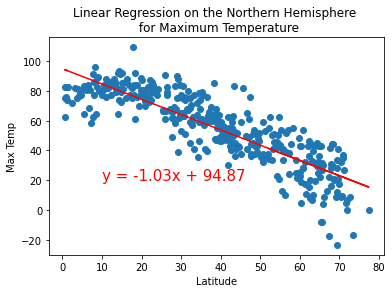

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

In [93]:
# Get r Value to see strength of correlation
linregress(x_values, y_values)[2]

-0.8556987757375564

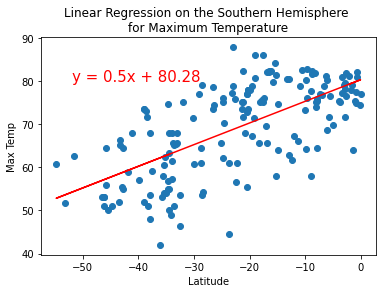

In [97]:
# Linear regression on the Southern Hemisphere
x_values2 = southern_hemi_df["Lat"]
y_values2 = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values2, y_values2,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-52,80))

In [98]:
# Get r Value to see strength of correlation
linregress(x_values2, y_values2)[2]

0.6584111409200661

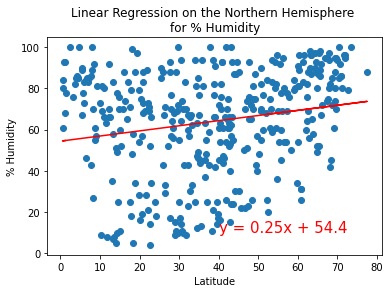

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

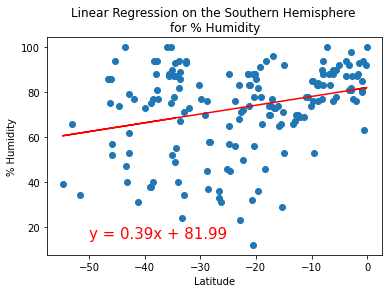

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))

In [101]:
# Get r Value to see strength of correlation
linregress(x_values, y_values)[2]

0.28549127085160475

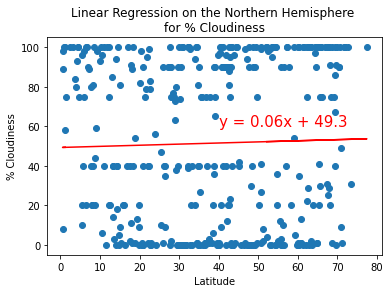

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(40,60))

In [103]:
# Get r Value to see strength of correlation
linregress(x_values, y_values)[2]

0.027341169892459875

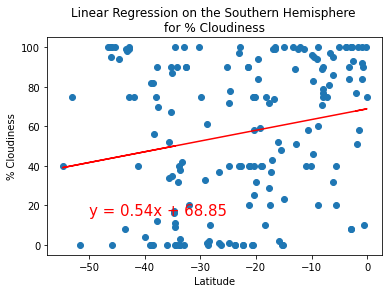

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,15))

In [105]:
# Get r Value to see strength of correlation
linregress(x_values, y_values)[2]

0.20523801816548498

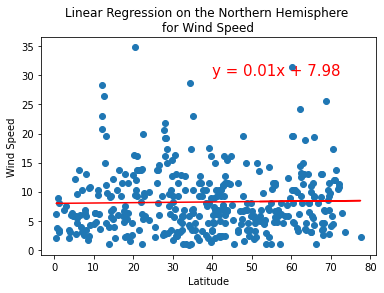

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,30))

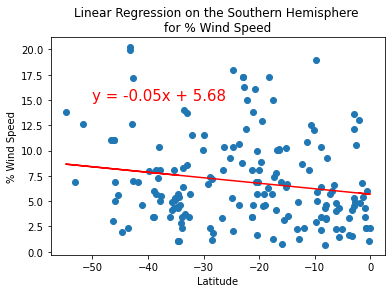

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Wind Speed', '% Wind Speed',(-50,15))